In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ['soc.religion.christian',  'rec.sport.baseball', 'sci.electronics']

# Load Data
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Check number of records in training and testing data
len(twenty_train.data),len(twenty_test.data)

# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(twenty_train.data)

# Check Shape of Count Vector
X_train_counts.shape

# Import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(X_train_counts.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_train_counts.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  11.453303523253249 
Silhoutte Score:  0.0063638586630896336


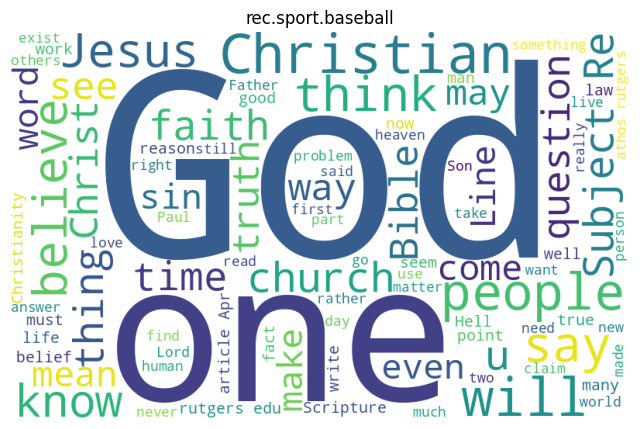

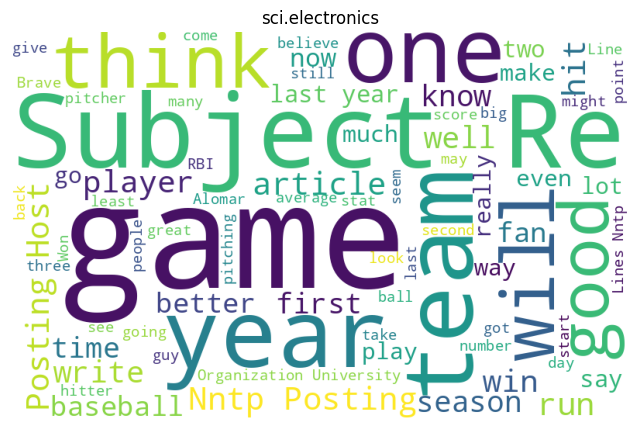

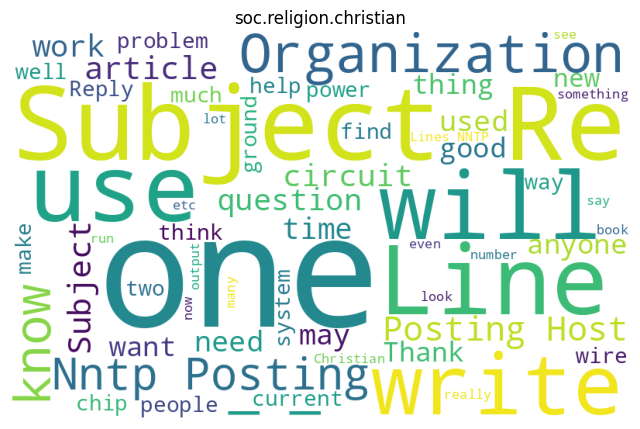

In [ ]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt


def word_cloud(text,wc_title,wc_file_name='C:/Users/salsa/Pictures/wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS)

    # Create WordCloud
    word_cloud = WordCloud(width = 800, height = 500,
                           background_color ='white',
                           stopwords = stopword_list,
                           min_font_size = 14).generate(text)

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6))

    # Set title for word cloud
    plt.title(wc_title)

    # Show image
    plt.imshow(word_cloud)

    # Remove Axis
    plt.axis("off")

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})

for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')

In [ ]:
cluster_map = {0: 'Religion', 1: 'Sport', 2: 'Technology'}
df['cluster'] = df['cluster'].map(cluster_map)

KeyError: ignored

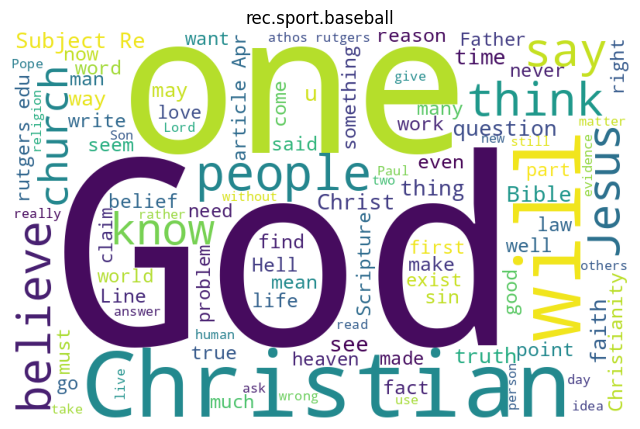

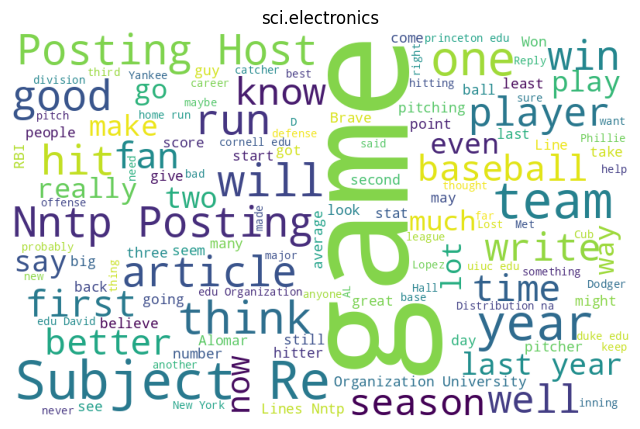

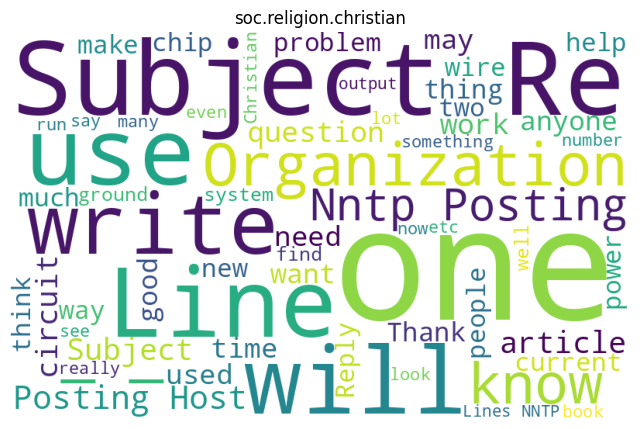

In [ ]:
import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})


for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to generate word clouds
def generate_wordcloud(text, label, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(label)
    plt.savefig(filename)
    plt.show()

# Assuming 'df' and 'pred_labels' are defined
# ...

# Iterate over unique labels
for i in df.labels.unique():
    new_df = df[df.labels == i]
    text = " ".join(new_df.text.tolist())

    # Check if the label index is within the range of target_names
    label_index = pred_labels[i]
    if label_index < len(twenty_train.target_names):
        label = twenty_train.target_names[label_index]
        filename = f"{label}.jpeg"
        generate_wordcloud(text, label, filename)
    else:
        print(f"Label index {label_index} is out of range for target_names.")


dari sini


In [ ]:
pip install numpy scikit-learn


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)

# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)

# Menyesuaikan reduksi dimensi untuk perbaikan waktu komputasi
svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)

# Jumlah cluster
k = 3

# K-means dengan Euclidean Distance
kmeans_euclidean = KMeans(n_clusters=k, random_state=42)
kmeans_euclidean.fit(X_lsa)

# Menampilkan label klaster untuk setiap dokumen (Euclidean Distance)
print("Label Klaster menggunakan Euclidean Distance:")
for i in range(k):
    print(f"Dokumen di klaster {i}:", np.where(kmeans_euclidean.labels_ == i)[0])

# Menghitung similarity matrix menggunakan Cosine Similarity
cosine_similarities = cosine_similarity(X_lsa)

# Mengubah similarity menjadi metrics yang dapat digunakan untuk k-Means (Cosine Similarity)
cosine_distances = 1 - cosine_similarities

# K-means dengan Cosine Similarity
kmeans_cosine = KMeans(n_clusters=k, random_state=42)
kmeans_cosine.fit(cosine_distances)

# Menampilkan label klaster untuk setiap dokumen (Cosine Similarity)
print("\nLabel Klaster menggunakan Cosine Similarity:")
for i in range(k):
    print(f"Dokumen di klaster {i}:", np.where(kmeans_cosine.labels_ == i)[0])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Label Klaster menggunakan Euclidean Distance:
Dokumen di klaster 0: [   2    4   10   13   14   20   21   24   34   37   40   44   46   48
   52   59   60   62   66   71   79   83   87   90   91   96   99  101
  107  113  129  130  131  132  136  138  144  146  148  151  156  161
  162  163  165  168  171  177  179  181  184  193  195  196  197  200
  204  205  207  208  209  213  214  215  218  219  223  225  226  230
  234  235  237  238  239  240  245  247  249  251  253  254  255  258
  259  267  268  271  272  273  275  281  284  290  294  296  297  298
  300  309  310  314  319  321  326  327  328  332  335  339  342  343
  348  354  357  358  361  367  368  370  378  382  385  389  391  393
  402  404  409  411  415  419  420  423  427  428  429  430  439  451
  454  458  462  463  464  465  466  468  470  473  475  478  479  482
  489  491  494  496  499  505  508  512  513  521  522  523  526  530
  531  532  535  536  537  539  544  551  553  554  555  556  557  559
  561  56

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Label Klaster menggunakan Cosine Similarity:
Dokumen di klaster 0: [   4    9   10   13   14   20   24   34   37   40   44   46   48   52
   59   60   62   66   69   71   72   78   79   82   83   87   90   91
   99  100  101  107  113  121  127  129  130  131  132  136  144  146
  148  156  161  162  163  165  168  171  172  177  179  193  195  196
  197  200  205  207  208  209  213  214  215  217  218  219  223  225
  226  235  236  237  239  240  245  247  249  251  254  255  258  259
  267  268  271  272  273  275  283  284  290  296  297  298  300  309
  310  312  314  319  321  325  327  328  332  335  342  343  354  358
  361  367  368  370  378  382  383  385  389  390  391  393  404  411
  415  419  423  427  428  429  430  437  439  451  453  458  462  463
  464  465  466  468  470  473  475  478  479  482  494  496  499  508
  512  513  521  522  523  526  530  531  532  534  535  536  537  539
  544  551  552  553  554  555  556  557  559  561  562  564  566  567
  568  56

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung similarity matrix menggunakan Cosine Similarity
cosine_similarities = cosine_similarity(X)

# Mengubah similarity menjadi metrics yang dapat digunakan untuk k-Means
euclidean_distances = 1 - cosine_similarities

# Melatih k-Means dengan similarity berdasarkan Cosine Similarity
kmeans_cosine = KMeans(n_clusters=k, random_state=42)
kmeans_cosine.fit(euclidean_distances)

# Menampilkan label klaster untuk setiap dokumen
print("\nLabel Klaster menggunakan Cosine Similarity:")
for i in range(k):
    print(f"Dokumen di klaster {i}:", np.where(kmeans_cosine.labels_ == i)[0])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


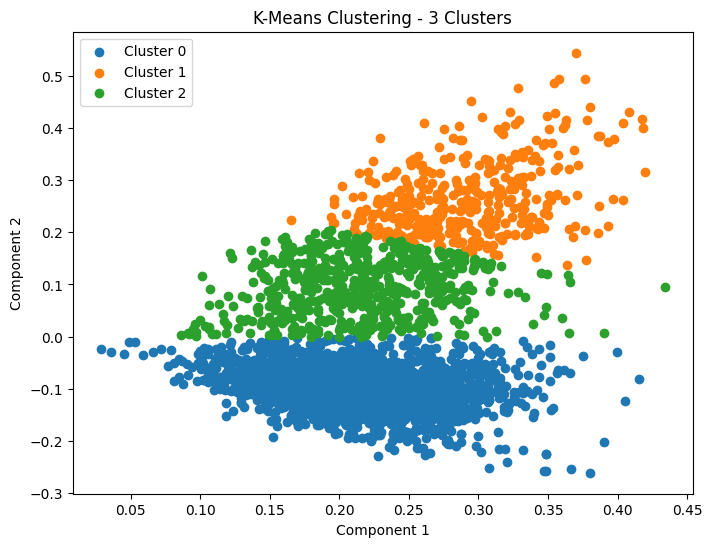

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)

# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)

# Reduksi dimensi untuk visualisasi
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# K-means dengan Euclidean Distance
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_svd)

# Visualisasi hasil k-means clustering
df = pd.DataFrame(X_svd, columns=['Component 1', 'Component 2'])
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Component 1'], cluster_data['Component 2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - 3 Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


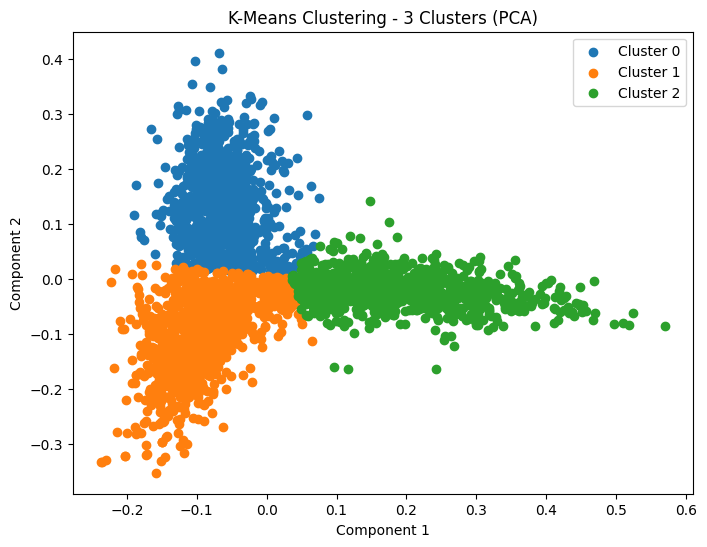

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # Mengganti TruncatedSVD dengan PCA
import matplotlib.pyplot as plt
import pandas as pd

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)

# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)  # Menggunakan PCA
X_pca = pca.fit_transform(X.toarray())

# K-means dengan Euclidean Distance
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Visualisasi hasil k-means clustering
df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Component 1'], cluster_data['Component 2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - 3 Clusters (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA  # Mengganti TruncatedSVD dengan PCA
import matplotlib.pyplot as plt
import pandas as pd

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)

# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)  # Menggunakan PCA
X_pca = pca.fit_transform(X.toarray())

# K-means dengan cosine
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, metric ='cosine')
kmeans.fit(X_pca)

# Visualisasi hasil k-means clustering
df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Component 1'], cluster_data['Component 2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - 3 Clusters (PCA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


TypeError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


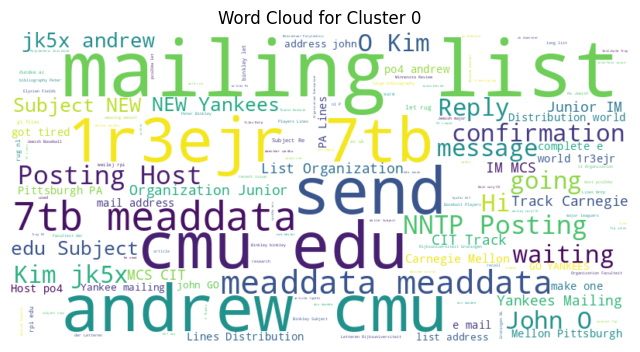

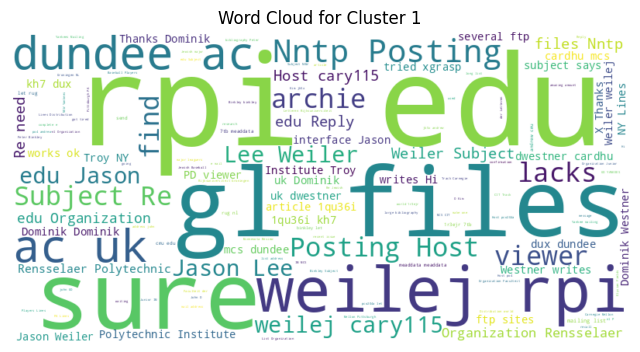

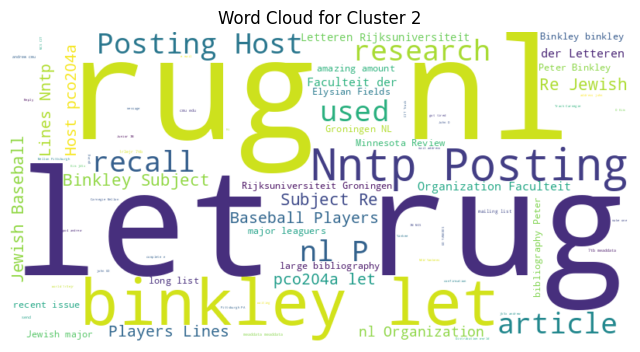

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)

# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)

# Jumlah cluster
k = 3

# K-means dengan Euclidean Distance
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Menentukan label klaster untuk setiap dokumen
data['Cluster'] = kmeans.labels_
pred_labels = kmeans.labels_

# Mengurutkan nomor klaster
sorted_labels = pd.Series(pred_labels).map({j: i for i, j in enumerate(pd.Series(pred_labels).unique())})

df = pd.DataFrame({"text": data.target, "labels": sorted_labels})

for i in df.labels.unique():
    new_df = df[df.labels == i]
    text = " ".join(data.data[idx] for idx in new_df.text)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {i}')
    plt.axis("off")
    plt.show()


In [ ]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(X_bow.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_bow.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  5.27013254977302 
Silhoutte Score:  -0.020437294903482166


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung Cosine Similarity antara dokumen
cosine_similarities = cosine_similarity(X_bow)

# Contoh perhitungan similarity antara dokumen 0 dan 1
cosine_similarity_01 = cosine_similarities[0, 1]

# Output similarity antara dokumen 0 dan 1
print(f"Cosine Similarity between document 0 and 1: {cosine_similarity_01}")


Cosine Similarity between document 0 and 1: 0.25805011480553947


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)

# Ekstraksi fitur menggunakan TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data.data)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# K-means dengan Euclidean Distance
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Menambahkan kolom Euclidean distance ke dalam dataframe
centroids = kmeans.cluster_centers_  # Mendapatkan pusat klaster
labels = kmeans.labels_  # Mendapatkan label klaster untuk setiap titik data
distances = np.zeros(X_pca.shape[0])  # Menyimpan jarak untuk setiap titik data

for i, centroid in enumerate(centroids):
    cluster_points = X_pca[labels == i]  # Poin-poin dalam klaster i
    for point in cluster_points:
        distances += np.linalg.norm(point - centroid, axis=1)

df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df['Cluster'] = kmeans.labels_
df['Euclidean Distance'] = distances  # Menambahkan kolom jarak ke dalam dataframe

# Visualisasi hasil k-means clustering
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Component 1'], cluster_data['Component 2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - 3 Clusters (with Euclidean Distance)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Menampilkan dataframe dengan kolom jarak Euclidean
print(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AxisError: ignored

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import pandas as pd
import nltk
import re
import string
import nltk
from nltk.corpus import stopwords

# Memuat data 20newsgroups untuk 3 kelas
categories = ['rec.sport.baseball', 'soc.religion.christian', 'comp.graphics']
data = fetch_20newsgroups(subset='all', categories=categories)
df = pd.DataFrame(data.data, columns=["corpus"])

X = vectorizer.fit_transform(data.data)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

nltk.download('punkt')
nltk.download('stopwords')

df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df.tail(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,corpus,cleaned
2959,Organization: City University of New York\nFro...,organization city university new york nt qc cu...
2960,From: bryanw@rahul.net (Bryan Woodworth)\nSubj...,bryanw rahul net bryan woodworth subject cview...
2961,From: andrew@srsune.shlrc.mq.edu.au (Andrew Mc...,andrew srsune shlrc mq edu au andrew mcveigh s...
2962,From: zyeh@caspian.usc.edu (zhenghao yeh)\nSub...,zyeh caspian usc edu zhenghao yeh subject dela...
2963,From: jhpb@sarto.budd-lake.nj.us (Joseph H. Bu...,jhpb sarto budd lake nj us joseph h buehler su...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

# Menggunakan CountVectorizer untuk Bag of Words
count_vectorizer = CountVectorizer(binary = True)
X_bow = count_vectorizer.fit_transform(df['cleaned']).toarray()
bow_df = pd.DataFrame(X_bow)
bow_df

,0,1,2,3,4,5,6,7,8,9,...,31700,31701,31702,31703,31704,31705,31706,31707,31708,31709
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from scipy.spatial.distance import euclidean

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_bow)

# Predict cluster labels for each data point
cluster_labels = kmeans.labels_
cluster_labels
# Calculate Davies-Bouldin Index (DBI) with Euclidean Distance
dbi = davies_bouldin_score(X_bow, cluster_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_bow, cluster_labels, metric='euclidean')

# Print cluster results and metrics
print(f"Davies-Bouldin Index: {dbi}")
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Davies-Bouldin Index: 6.283776867884444
Silhouette Score: 0.13695305040592806


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
# Calculate Davies-Bouldin Index (DBI) with Cosine Similarity
centroids = kmeans.cluster_centers_
cosine_distances = pairwise_distances(X_bow, centroids, metric='cosine')

# Calculate DBI
dbi = 0
for i in range(len(centroids)):
    max_d = -1
    for j in range(len(centroids)):
        if i != j:
            d = (cosine_distances[i] + cosine_distances[j]).mean() / cosine_distances[i, j]
            if d > max_d:
                max_d = d
    dbi += max_d

dbi /= len(centroids)

# Calculate Silhouette Score with Cosine Similarity
silhouette_avg = silhouette_score(X_bow, cluster_labels, metric='cosine')

# Print cluster results and metrics
print(f"Davies-Bouldin Index: {dbi}")
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 2.1591759609009853
Silhouette Score: 0.011146670004861308


In [ ]:
# Menghitung Cosine similarity
cosine_distances = pairwise_distances(X_bow, metric='cosine')

# Menampilkan hasil Cosine similarity
print("Cosine Similarity (Bag of Words):")
print(cosine_distances)

Cosine Similarity (Bag of Words):
[[0.         0.74400609 0.85224045 ... 0.80606051 0.70093313 0.96234709]
 [0.74400609 0.         0.86155356 ... 0.87470409 0.57967445 0.96361782]
 [0.85224045 0.86155356 0.         ... 0.97124088 0.82815005 0.95672774]
 ...
 [0.80606051 0.87470409 0.97124088 ... 0.         0.84720199 0.85159668]
 [0.70093313 0.57967445 0.82815005 ... 0.84720199 0.         0.97810412]
 [0.96234709 0.96361782 0.95672774 ... 0.85159668 0.97810412 0.        ]]


In [ ]:

# K-means dengan cosine
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Menghitung jarak menggunakan cosine similarity
cosine_distances = pairwise_distances(X_pca, kmeans.cluster_centers_, metric='cosine').min(axis=1)

# Menambahkan kolom jarak ke dalam dataframe
df = pd.DataFrame(X_pca, columns=['Component 1', 'Component 2'])
df['Cluster'] = kmeans.labels_
df['Cosine Distance'] = cosine_distances  # Menambahkan kolom jarak ke dalam dataframe

# Visualisasi hasil k-means clustering
plt.figure(figsize=(8, 6))
for cluster in range(k):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Component 1'], cluster_data['Component 2'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering - 3 Clusters (with Cosine Distance)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

# Menampilkan dataframe dengan kolom jarak cosine
print(df)


NameError: ignored